<a href="https://colab.research.google.com/github/KMG5498/24-/blob/main/24%EC%97%AC%EB%A6%84_%EB%9E%A9%EC%9D%B8%ED%84%B4_%EC%B4%88%EB%B0%98_%EC%BD%94%EB%93%9C_1%EB%B2%88_10%EB%B2%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

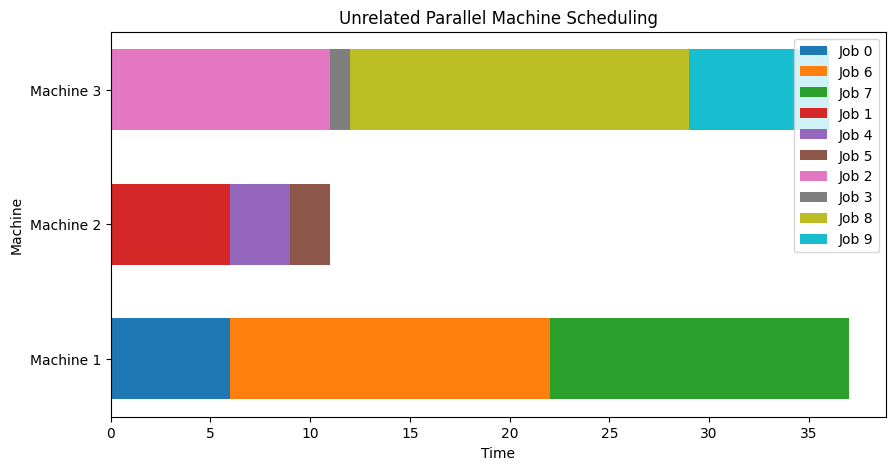

In [ ]:
# @title 1번 코드

import random
import matplotlib.pyplot as plt

# 실험 instance
num_jobs = 10  # Number of jobs
num_machines = 3  # Number of machines

# 각 job에 해당하는 processing time 생성
processing_times = [[random.randint(1, 20) for _ in range(num_machines)] for _ in range(num_jobs)]

# random selection을 통한 machine에 job할당
def schedule_jobs(processing_times):
    machine_schedule = [[] for _ in range(num_machines)]
    for job_index in range(num_jobs):
        machine_index = random.randint(0, num_machines - 1)  # Randomly select a machine
        machine_schedule[machine_index].append((job_index, processing_times[job_index][machine_index]))

    # 할당한 job이 없는 machine이 존재할 경우 처리
    for machine_index in range(num_machines):
        if not machine_schedule[machine_index]:
            machine_schedule[machine_index] = []

    return machine_schedule

# 스케쥴 획득
machine_schedule = schedule_jobs(processing_times)

# 스케쥴에 따라 flat schedule 생성
flat_schedule = []
for machine_index, jobs in enumerate(machine_schedule):
    current_time = 0
    for job_index, (job_id, proc_time) in enumerate(jobs):
        start_time = current_time
        end_time = start_time + proc_time
        flat_schedule.append((job_id, start_time, end_time))
        current_time = end_time



# 차트 생성
fig, ax = plt.subplots(figsize=(10, 5))

for job_index, start_time, end_time in flat_schedule:
    machine_index = next((i for i in range(num_machines) if any(job_index == x[0] for x in machine_schedule[i])), None)
    if machine_index is not None:
        ax.barh(machine_index, end_time - start_time, left=start_time, height=0.6, label=f'Job {job_index}')

ax.set_yticks(range(num_machines))
ax.set_yticklabels([f'Machine {i+1}' for i in range(num_machines)])
ax.set_xlabel('Time')
ax.set_ylabel('Machine')
ax.set_title('Unrelated Parallel Machine Scheduling')

plt.legend()
plt.show()

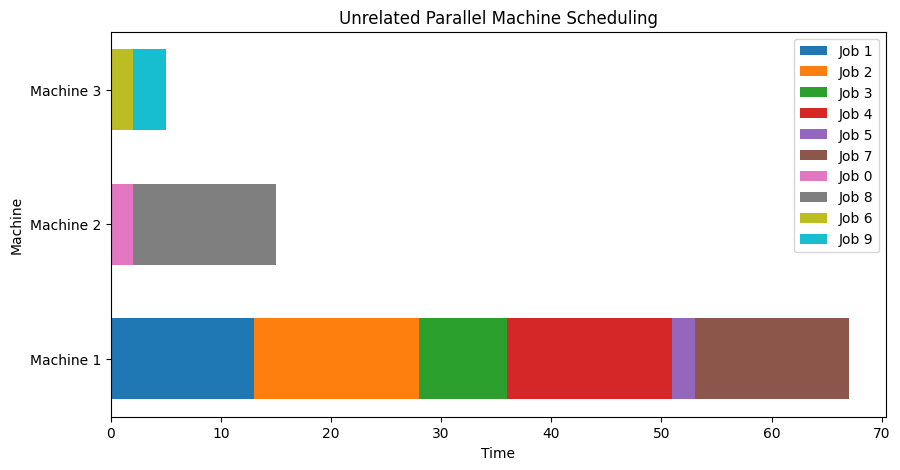

In [ ]:
# @title 2번 코드
import random
import matplotlib.pyplot as plt

# 실험 instance
num_jobs = 10  # Number of jobs
num_machines = 3  # Number of machines

# 각 기계에 대해 각 작업의 실행 시간을 지정
machine_processing_times = [[] for _ in range(num_machines)]
for job_index in range(num_jobs):
    for machine_index in range(num_machines):
        machine_processing_times[machine_index].append(random.randint(1, 20))

# random selection을 통한 machine에 job할당
def schedule_jobs(machine_processing_times):
    machine_schedule = [[] for _ in range(num_machines)]
    for job_index in range(num_jobs):
        machine_index = random.randint(0, num_machines - 1)  # Randomly select a machine
        proc_time = machine_processing_times[machine_index][job_index]
        machine_schedule[machine_index].append((job_index, proc_time))

    # 할당한 job이 없는 machine이 존재할 경우 처리
    for machine_index in range(num_machines):
        if not machine_schedule[machine_index]:
            machine_schedule[machine_index] = []

    return machine_schedule

# 스케쥴 획득
machine_schedule = schedule_jobs(machine_processing_times)

# 스케쥴에 따라 flat schedule 생성
flat_schedule = []
for machine_index, jobs in enumerate(machine_schedule):
    current_time = 0
    for job_index, proc_time in jobs:
        start_time = current_time
        end_time = start_time + proc_time
        flat_schedule.append((job_index, start_time, end_time))
        current_time = end_time

# 차트 생성
fig, ax = plt.subplots(figsize=(10, 5))

for job_index, start_time, end_time in flat_schedule:
    machine_index = next((i for i in range(num_machines) if any(job_index == x[0] for x in machine_schedule[i])), None)
    if machine_index is not None:
        ax.barh(machine_index, end_time - start_time, left=start_time, height=0.6, label=f'Job {job_index}')

ax.set_yticks(range(num_machines))
ax.set_yticklabels([f'Machine {i+1}' for i in range(num_machines)])
ax.set_xlabel('Time')
ax.set_ylabel('Machine')
ax.set_title('Unrelated Parallel Machine Scheduling')

plt.legend()
plt.show()

#Unrelated machine parallel machine
#조건 - 각 job이 machine에 따라 processing time 다르다.
#조건 - 모든 job이 한 번에 부여된다.
#조건 - random selection으로 해결한다.

#다음 코드에 추가할 조건 - 각 job마다 due date를 정하고 tardiness 합을 출력한다.
#다음 코드에 추가할 조건 - greedy로 해결 - job을 할당할때 가장 종료시간이 이른 machine을 선택

Total tardiness: 38


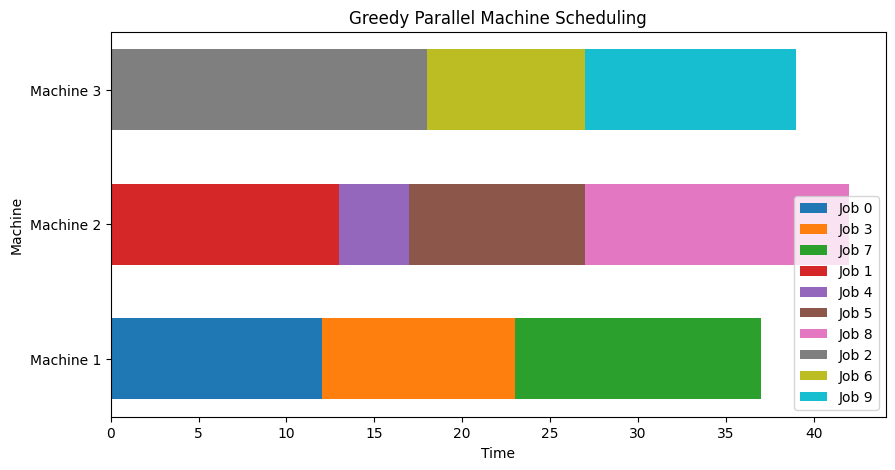

In [ ]:
# @title 3번 코드
import random
import matplotlib.pyplot as plt

# 실험 instance
num_jobs = 10  # Number of jobs
num_machines = 3  # Number of machines

# 각 기계에 대해 각 작업의 실행 시간과 마감 시간을 지정
machine_processing_times = [[] for _ in range(num_machines)]
due_dates = [random.randint(20, 40) for _ in range(num_jobs)]  # 각 작업의 마감 시간 설정

for job_index in range(num_jobs):
    for machine_index in range(num_machines):
        machine_processing_times[machine_index].append(random.randint(1, 20))

# Greedy 알고리즘을 사용한 job 할당
def schedule_jobs(machine_processing_times, due_dates):
    machine_schedule = [[] for _ in range(num_machines)]
    machine_end_times = [0] * num_machines  # 각 기계의 작업 종료 시간 초기화

    tardiness_sum = 0

    # 모든 작업에 대해 처리
    for job_index in range(num_jobs):
        min_end_time = float('inf')
        best_machine = -1

        # 모든 기계를 확인하여 가장 일찍 끝나는 기계 선택
        for machine_index in range(num_machines):
            if machine_end_times[machine_index] < min_end_time:
                min_end_time = machine_end_times[machine_index]
                best_machine = machine_index

        proc_time = machine_processing_times[best_machine][job_index]
        job_due_date = due_dates[job_index]

        start_time = machine_end_times[best_machine]  # 작업 시작 시간
        end_time = start_time + proc_time  # 작업 종료 시간

        machine_schedule[best_machine].append((job_index, proc_time, start_time, end_time))
        machine_end_times[best_machine] = end_time  # 기계의 작업 종료 시간 갱신

        # 지연 시간 계산
        tardiness = max(0, end_time - job_due_date)
        tardiness_sum += tardiness

    # 할당한 job이 없는 machine이 존재할 경우 처리
    for machine_index in range(num_machines):
        if not machine_schedule[machine_index]:
            machine_schedule[machine_index] = []

    return machine_schedule, tardiness_sum

# 스케쥴 획득
machine_schedule, total_tardiness = schedule_jobs(machine_processing_times, due_dates)

# 간트 차트 생성을 위한 데이터 정리
flat_schedule = []
for machine_index, jobs in enumerate(machine_schedule):
    for job_index, proc_time, start_time, end_time in jobs:
        flat_schedule.append((job_index, start_time, end_time))

# Plotting the Gantt chart
fig, ax = plt.subplots(figsize=(10, 5))

for job_index, start_time, end_time in flat_schedule:
    # 각 job의 할당된 기계 인덱스를 가져와서 해당 기계에 맞는 barh를 추가
    for machine_index in range(num_machines):
        if any(job_index == x[0] for x in machine_schedule[machine_index]):
            ax.barh(machine_index, end_time - start_time, left=start_time, height=0.6, label=f'Job {job_index}')

ax.set_yticks(range(num_machines))
ax.set_yticklabels([f'Machine {i+1}' for i in range(num_machines)])
ax.set_xlabel('Time')
ax.set_ylabel('Machine')
ax.set_title('Greedy Parallel Machine Scheduling')

plt.legend()

# Tardiness의 합 출력
print(f"Total tardiness: {total_tardiness}")

plt.show()


#다음 코드에 추가할 조건  - machine eleigibility 추가
#다음 코드에 추가할 조건  -
#다음 코드에 추가할 조건  -
#다음 코드에 추가할 조건  -
#다음 코드에 추가할 조건  -

Total tardiness (Greedy): 33


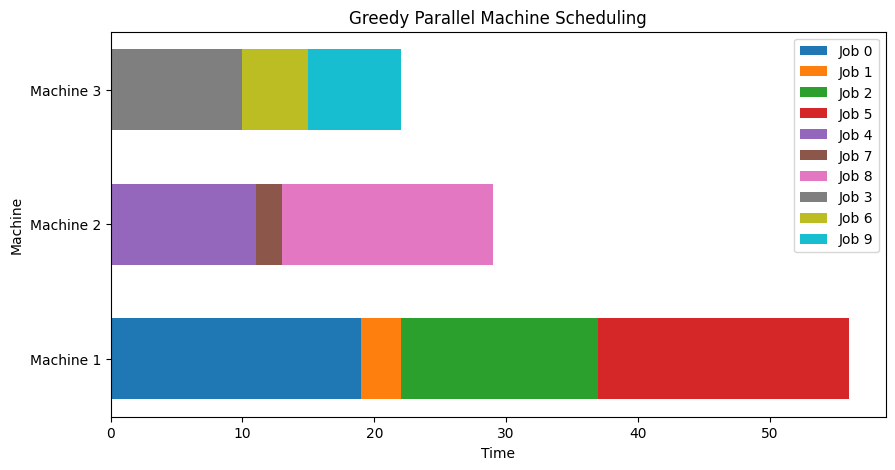

In [ ]:
# @title 4번 코드
import random
import matplotlib.pyplot as plt

# 실험 instance
num_jobs = 10  # Number of jobs
num_machines = 3  # Number of machines

# 각 기계에 대해 각 작업의 실행 시간을 지정
machine_processing_times = [[] for _ in range(num_machines)]
due_dates = [random.randint(20, 40) for _ in range(num_jobs)]  # 각 작업의 마감 시간 설정

for job_index in range(num_jobs):
    for machine_index in range(num_machines):
        machine_processing_times[machine_index].append(random.randint(1, 20))

# 각 job이 할당될 eligible한 기계 설정
eligible_machines = [[] for _ in range(num_jobs)]
for job_index in range(num_jobs):
    num_eligible = random.randint(1, num_machines)  # 최소 1개에서 최대 num_machines 개의 기계 선택
    eligible_machines[job_index] = random.sample(range(num_machines), num_eligible)

# Greedy 알고리즘을 사용한 job 할당
def schedule_jobs_greedy(machine_processing_times, due_dates, eligible_machines):
    machine_schedule = [[] for _ in range(num_machines)]
    machine_end_times = [0] * num_machines  # 각 기계의 작업 종료 시간 초기화

    tardiness_sum = 0

    # 모든 작업에 대해 처리
    for job_index in range(num_jobs):
        min_end_time = float('inf')
        candidate_machines = []  # eligible한 기계 후보들

        for machine_index in eligible_machines[job_index]:
            if machine_end_times[machine_index] <= due_dates[job_index]:
                candidate_machines.append(machine_index)

        # eligible한 기계 후보 중에서 가장 일찍 끝나는 기계 선택
        for machine_index in candidate_machines:
            if machine_end_times[machine_index] < min_end_time:
                min_end_time = machine_end_times[machine_index]
                best_machine = machine_index

        proc_time = machine_processing_times[best_machine][job_index]
        job_due_date = due_dates[job_index]

        start_time = machine_end_times[best_machine]  # 작업 시작 시간
        end_time = start_time + proc_time  # 작업 종료 시간

        machine_schedule[best_machine].append((job_index, proc_time, start_time, end_time))
        machine_end_times[best_machine] = end_time  # 기계의 작업 종료 시간 갱신

        # 지연 시간 계산
        tardiness = max(0, end_time - job_due_date)
        tardiness_sum += tardiness

    # Ensure each machine has a list even if empty
    for machine_index in range(num_machines):
        if not machine_schedule[machine_index]:
            machine_schedule[machine_index] = []

    return machine_schedule, tardiness_sum

# Greedy 알고리즘을 사용한 스케쥴 획득
machine_schedule_greedy, total_tardiness_greedy = schedule_jobs_greedy(machine_processing_times, due_dates, eligible_machines)

# 간트 차트 생성을 위한 데이터 정리 (Greedy)
flat_schedule_greedy = []
for machine_index, jobs in enumerate(machine_schedule_greedy):
    for job_index, proc_time, start_time, end_time in jobs:
        flat_schedule_greedy.append((job_index, start_time, end_time))

# Plotting the Gantt chart
fig, ax = plt.subplots(figsize=(10, 5))

for job_index, start_time, end_time in flat_schedule_greedy:
    # 각 job의 할당된 기계 인덱스를 가져와서 해당 기계에 맞는 barh를 추가
    for machine_index in range(num_machines):
        if any(job_index == x[0] for x in machine_schedule_greedy[machine_index]):
            ax.barh(machine_index, end_time - start_time, left=start_time, height=0.6, label=f'Job {job_index}')

ax.set_yticks(range(num_machines))
ax.set_yticklabels([f'Machine {i+1}' for i in range(num_machines)])
ax.set_xlabel('Time')
ax.set_ylabel('Machine')
ax.set_title('Greedy Parallel Machine Scheduling')

plt.legend()

# Tardiness의 합 출력
print(f"Total tardiness (Greedy): {total_tardiness_greedy}")

plt.show()


#다음 코드에 추가할 조건  - greedy 방식을 두개로 비교 - simple: 지금, future - job을 배정한 후 가장 빨리 끝나는 machine에 배정
#다음 코드에 추가할 조건  - 이거 setup time 도입하려면 필요할거 같아서
#다음 코드에 추가할 조건  -
#다음 코드에 추가할 조건  - candidate machine도 duedate상관없이 전부 추가로 수정
#다음 코드에 추가할 조건  -

Total tardiness (Simple Greedy): 38


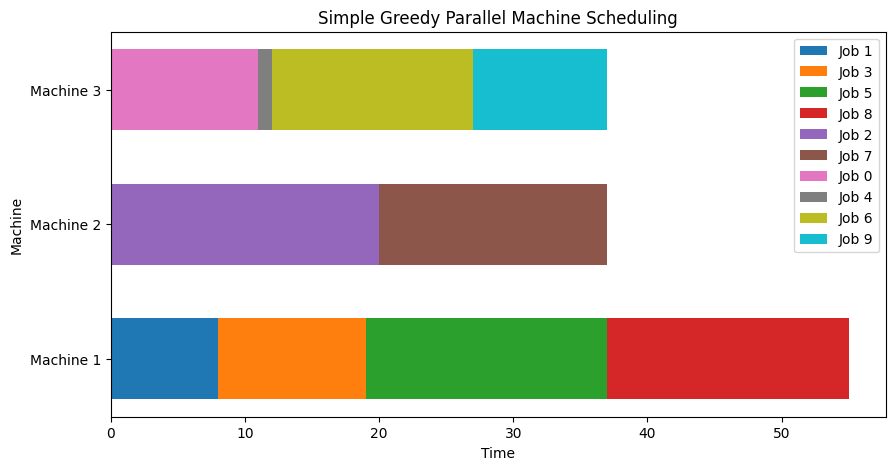

Total tardiness (Future Greedy): 6


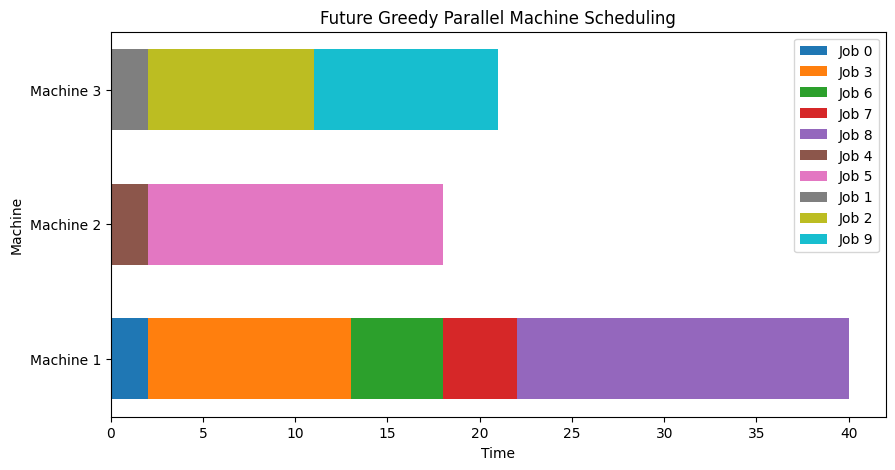

In [ ]:
# @title 5번 코드
import random
import matplotlib.pyplot as plt

# 실험 instance
num_jobs = 10  # Number of jobs
num_machines = 3  # Number of machines

# 각 기계에 대해 각 작업의 실행 시간을 지정
machine_processing_times = [[] for _ in range(num_machines)]
due_dates = [random.randint(20, 40) for _ in range(num_jobs)]  # 각 작업의 마감 시간 설정

for job_index in range(num_jobs):
    for machine_index in range(num_machines):
        machine_processing_times[machine_index].append(random.randint(1, 20))

# 각 job이 할당될 eligible한 기계 설정
eligible_machines = [[] for _ in range(num_jobs)]
for job_index in range(num_jobs):
    num_eligible = random.randint(1, num_machines)  # 최소 1개에서 최대 num_machines 개의 기계 선택
    eligible_machines[job_index] = random.sample(range(num_machines), num_eligible)

# Simple Greedy 알고리즘을 사용한 job 할당
def schedule_jobs_simple_greedy(machine_processing_times, due_dates, eligible_machines):
    machine_schedule = [[] for _ in range(num_machines)]
    machine_end_times = [0] * num_machines  # 각 기계의 작업 종료 시간 초기화

    tardiness_sum = 0

    # 모든 작업에 대해 처리
    for job_index in range(num_jobs):
        min_end_time = float('inf')
        candidate_machines = list(eligible_machines[job_index])  # eligible한 기계 후보들

        # eligible한 기계 후보 중에서 가장 일찍 끝나는 기계 선택
        for machine_index in candidate_machines:
            if machine_end_times[machine_index] < min_end_time:
                min_end_time = machine_end_times[machine_index]
                best_machine = machine_index

        proc_time = machine_processing_times[best_machine][job_index]
        job_due_date = due_dates[job_index]

        start_time = machine_end_times[best_machine]  # 작업 시작 시간
        end_time = start_time + proc_time  # 작업 종료 시간

        machine_schedule[best_machine].append((job_index, proc_time, start_time, end_time))
        machine_end_times[best_machine] = end_time  # 기계의 작업 종료 시간 갱신

        # 지연 시간 계산
        tardiness = max(0, end_time - job_due_date)
        tardiness_sum += tardiness

    # Ensure each machine has a list even if empty
    for machine_index in range(num_machines):
        if not machine_schedule[machine_index]:
            machine_schedule[machine_index] = []

    return machine_schedule, tardiness_sum

# Future Greedy 알고리즘을 사용한 job 할당
def schedule_jobs_future_greedy(machine_processing_times, due_dates, eligible_machines):
    machine_schedule = [[] for _ in range(num_machines)]
    machine_end_times = [0] * num_machines  # 각 기계의 작업 종료 시간 초기화

    tardiness_sum = 0

    # 모든 작업에 대해 처리
    for job_index in range(num_jobs):
        candidate_machines = list(eligible_machines[job_index])  # eligible한 기계 후보들

        # 모든 후보 기계에 대해 job을 할당한 후 가장 빨리 끝나는 기계 선택
        min_end_time = float('inf')
        for machine_index in candidate_machines:
            proc_time = machine_processing_times[machine_index][job_index]
            start_time = machine_end_times[machine_index]
            end_time = start_time + proc_time

            # 가장 일찍 끝나는 기계 선택
            if end_time < min_end_time:
                min_end_time = end_time
                best_machine = machine_index

        proc_time = machine_processing_times[best_machine][job_index]
        job_due_date = due_dates[job_index]

        start_time = machine_end_times[best_machine]  # 작업 시작 시간
        end_time = start_time + proc_time  # 작업 종료 시간

        machine_schedule[best_machine].append((job_index, proc_time, start_time, end_time))
        machine_end_times[best_machine] = end_time  # 기계의 작업 종료 시간 갱신

        # 지연 시간 계산
        tardiness = max(0, end_time - job_due_date)
        tardiness_sum += tardiness

    # Ensure each machine has a list even if empty
    for machine_index in range(num_machines):
        if not machine_schedule[machine_index]:
            machine_schedule[machine_index] = []

    return machine_schedule, tardiness_sum

# Simple Greedy 알고리즘을 사용한 스케쥴 획득
machine_schedule_simple_greedy, total_tardiness_simple_greedy = schedule_jobs_simple_greedy(machine_processing_times, due_dates, eligible_machines)

# Future Greedy 알고리즘을 사용한 스케쥴 획득
machine_schedule_future_greedy, total_tardiness_future_greedy = schedule_jobs_future_greedy(machine_processing_times, due_dates, eligible_machines)

# 간트 차트 생성을 위한 데이터 정리 (Simple Greedy)
flat_schedule_simple_greedy = []
for machine_index, jobs in enumerate(machine_schedule_simple_greedy):
    for job_index, proc_time, start_time, end_time in jobs:
        flat_schedule_simple_greedy.append((job_index, start_time, end_time))

# 간트 차트 생성을 위한 데이터 정리 (Future Greedy)
flat_schedule_future_greedy = []
for machine_index, jobs in enumerate(machine_schedule_future_greedy):
    for job_index, proc_time, start_time, end_time in jobs:
        flat_schedule_future_greedy.append((job_index, start_time, end_time))

# Plotting the Gantt chart for Simple Greedy
fig, ax = plt.subplots(figsize=(10, 5))

for machine_index in range(num_machines):
    for job_index, start_time, end_time in flat_schedule_simple_greedy:
        if any(job_index == x[0] for x in machine_schedule_simple_greedy[machine_index]):
            ax.barh(machine_index, end_time - start_time, left=start_time, height=0.6, label=f'Job {job_index}')

ax.set_yticks(range(num_machines))
ax.set_yticklabels([f'Machine {i+1}' for i in range(num_machines)])
ax.set_xlabel('Time')
ax.set_ylabel('Machine')
ax.set_title('Simple Greedy Parallel Machine Scheduling')

plt.legend()

# Tardiness의 합 출력 (Simple Greedy)
print(f"Total tardiness (Simple Greedy): {total_tardiness_simple_greedy}")

plt.show()

# Plotting the Gantt chart for Future Greedy
fig, ax = plt.subplots(figsize=(10, 5))

for machine_index in range(num_machines):
    for job_index, start_time, end_time in flat_schedule_future_greedy:
        if any(job_index == x[0] for x in machine_schedule_future_greedy[machine_index]):
            ax.barh(machine_index, end_time - start_time, left=start_time, height=0.6, label=f'Job {job_index}')

ax.set_yticks(range(num_machines))
ax.set_yticklabels([f'Machine {i+1}' for i in range(num_machines)])
ax.set_xlabel('Time')
ax.set_ylabel('Machine')
ax.set_title('Future Greedy Parallel Machine Scheduling')

plt.legend()

# Tardiness의 합 출력 (Future Greedy)
print(f"Total tardiness (Future Greedy): {total_tardiness_future_greedy}")

plt.show()

#다음 코드에 추가할 조건  - setup time 추가
#다음 코드에 추가할 조건  -
#다음 코드에 추가할 조건  -
#다음 코드에 추가할 조건  -
#다음 코드에 추가할 조건  -

Total tardiness (Simple Greedy): 49


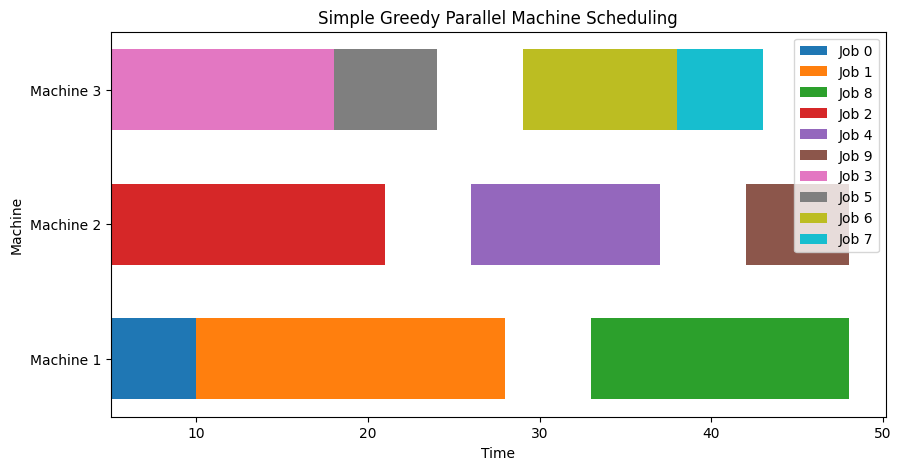

Total tardiness (Future Greedy): 30


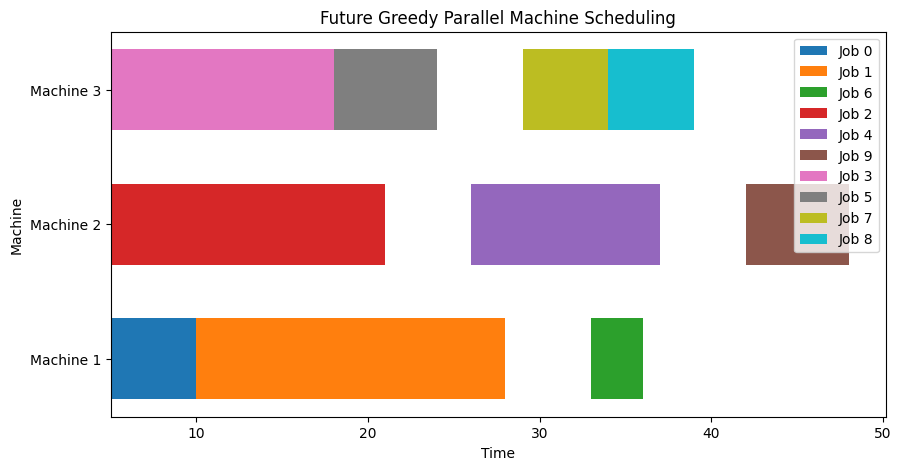

In [ ]:
# @title 6번 코드
import random
import matplotlib.pyplot as plt

# 실험 instance
num_jobs = 10  # Number of jobs
num_machines = 3  # Number of machines

# 각 기계에 대해 각 작업의 실행 시간을 지정
machine_processing_times = [[] for _ in range(num_machines)]
due_dates = [random.randint(20, 40) for _ in range(num_jobs)]  # 각 작업의 마감 시간 설정
setup_time = 5  # Setup time

for job_index in range(num_jobs):
    for machine_index in range(num_machines):
        machine_processing_times[machine_index].append(random.randint(1, 20))

# 각 job이 할당될 eligible한 기계 설정
eligible_machines = [[] for _ in range(num_jobs)]
for job_index in range(num_jobs):
    num_eligible = random.randint(1, num_machines)  # 최소 1개에서 최대 num_machines 개의 기계 선택
    eligible_machines[job_index] = random.sample(range(num_machines), num_eligible)

# Job families 설정
job_families = [
    [0, 1, 2],  # Family 1
    [3, 4, 5],  # Family 2
    [6, 7, 8, 9]  # Family 3
]

# 각 job의 family 찾기
job_family = {}
for i, family in enumerate(job_families):
    for job in family:
        job_family[job] = i

# Simple Greedy 알고리즘을 사용한 job 할당
def schedule_jobs_simple_greedy(machine_processing_times, due_dates, eligible_machines, job_family, setup_time):
    machine_schedule = [[] for _ in range(num_machines)]
    machine_end_times = [0] * num_machines  # 각 기계의 작업 종료 시간 초기화
    last_job_family = [-1] * num_machines  # 각 기계의 마지막 작업의 family

    tardiness_sum = 0

    # 모든 작업에 대해 처리
    for job_index in range(num_jobs):
        min_end_time = float('inf')
        candidate_machines = list(eligible_machines[job_index])  # eligible한 기계 후보들

        # eligible한 기계 후보 중에서 가장 일찍 끝나는 기계 선택
        for machine_index in candidate_machines:
            setup = setup_time if last_job_family[machine_index] != job_family[job_index] else 0
            end_time_with_setup = machine_end_times[machine_index] + setup
            if end_time_with_setup < min_end_time:
                min_end_time = end_time_with_setup
                best_machine = machine_index

        proc_time = machine_processing_times[best_machine][job_index]
        job_due_date = due_dates[job_index]
        setup = setup_time if last_job_family[best_machine] != job_family[job_index] else 0

        start_time = machine_end_times[best_machine] + setup  # 작업 시작 시간
        end_time = start_time + proc_time  # 작업 종료 시간

        machine_schedule[best_machine].append((job_index, proc_time, start_time, end_time))
        machine_end_times[best_machine] = end_time  # 기계의 작업 종료 시간 갱신
        last_job_family[best_machine] = job_family[job_index]  # 마지막 작업 family 갱신

        # 지연 시간 계산
        tardiness = max(0, end_time - job_due_date)
        tardiness_sum += tardiness

    return machine_schedule, tardiness_sum

# Future Greedy 알고리즘을 사용한 job 할당
def schedule_jobs_future_greedy(machine_processing_times, due_dates, eligible_machines, job_family, setup_time):
    machine_schedule = [[] for _ in range(num_machines)]
    machine_end_times = [0] * num_machines  # 각 기계의 작업 종료 시간 초기화
    last_job_family = [-1] * num_machines  # 각 기계의 마지막 작업의 family

    tardiness_sum = 0

    # 모든 작업에 대해 처리
    for job_index in range(num_jobs):
        candidate_machines = list(eligible_machines[job_index])  # eligible한 기계 후보들

        # 모든 후보 기계에 대해 job을 할당한 후 가장 빨리 끝나는 기계 선택
        min_end_time = float('inf')
        for machine_index in candidate_machines:
            setup = setup_time if last_job_family[machine_index] != job_family[job_index] else 0
            start_time = machine_end_times[machine_index] + setup
            end_time = start_time + machine_processing_times[machine_index][job_index]

            # 가장 일찍 끝나는 기계 선택
            if end_time < min_end_time:
                min_end_time = end_time
                best_machine = machine_index

        proc_time = machine_processing_times[best_machine][job_index]
        job_due_date = due_dates[job_index]
        setup = setup_time if last_job_family[best_machine] != job_family[job_index] else 0

        start_time = machine_end_times[best_machine] + setup  # 작업 시작 시간
        end_time = start_time + proc_time  # 작업 종료 시간

        machine_schedule[best_machine].append((job_index, proc_time, start_time, end_time))
        machine_end_times[best_machine] = end_time  # 기계의 작업 종료 시간 갱신
        last_job_family[best_machine] = job_family[job_index]  # 마지막 작업 family 갱신

        # 지연 시간 계산
        tardiness = max(0, end_time - job_due_date)
        tardiness_sum += tardiness

    return machine_schedule, tardiness_sum

# Simple Greedy 알고리즘을 사용한 스케쥴 획득
machine_schedule_simple_greedy, total_tardiness_simple_greedy = schedule_jobs_simple_greedy(machine_processing_times, due_dates, eligible_machines, job_family, setup_time)

# Future Greedy 알고리즘을 사용한 스케쥴 획득
machine_schedule_future_greedy, total_tardiness_future_greedy = schedule_jobs_future_greedy(machine_processing_times, due_dates, eligible_machines, job_family, setup_time)

# 간트 차트 생성을 위한 데이터 정리 (Simple Greedy)
flat_schedule_simple_greedy = []
for machine_index, jobs in enumerate(machine_schedule_simple_greedy):
    for job_index, proc_time, start_time, end_time in jobs:
        flat_schedule_simple_greedy.append((job_index, start_time, end_time, machine_index))

# 간트 차트 생성을 위한 데이터 정리 (Future Greedy)
flat_schedule_future_greedy = []
for machine_index, jobs in enumerate(machine_schedule_future_greedy):
    for job_index, proc_time, start_time, end_time in jobs:
        flat_schedule_future_greedy.append((job_index, start_time, end_time, machine_index))

# Plotting the Gantt chart for Simple Greedy
fig, ax = plt.subplots(figsize=(10, 5))

for job_index, start_time, end_time, machine_index in flat_schedule_simple_greedy:
    ax.barh(machine_index, end_time - start_time, left=start_time, height=0.6, label=f'Job {job_index}')

ax.set_yticks(range(num_machines))
ax.set_yticklabels([f'Machine {i+1}' for i in range(num_machines)])
ax.set_xlabel('Time')
ax.set_ylabel('Machine')
ax.set_title('Simple Greedy Parallel Machine Scheduling')

plt.legend()

# Tardiness의 합 출력 (Simple Greedy)
print(f"Total tardiness (Simple Greedy): {total_tardiness_simple_greedy}")

plt.show()

# Plotting the Gantt chart for Future Greedy
fig, ax = plt.subplots(figsize=(10, 5))

for job_index, start_time, end_time, machine_index in flat_schedule_future_greedy:
    ax.barh(machine_index, end_time - start_time, left=start_time, height=0.6, label=f'Job {job_index}')

ax.set_yticks(range(num_machines))
ax.set_yticklabels([f'Machine {i+1}' for i in range(num_machines)])
ax.set_xlabel('Time')
ax.set_ylabel('Machine')
ax.set_title('Future Greedy Parallel Machine Scheduling')

plt.legend()

# Tardiness의 합 출력 (Future Greedy)
print(f"Total tardiness (Future Greedy): {total_tardiness_future_greedy}")

plt.show()

#다음 코드에 추가할 조건  - GA 적용
#다음 코드에 추가할 조건  -
#다음 코드에 추가할 조건  -
#다음 코드에 추가할 조건  -
#다음 코드에 추가할 조건  -

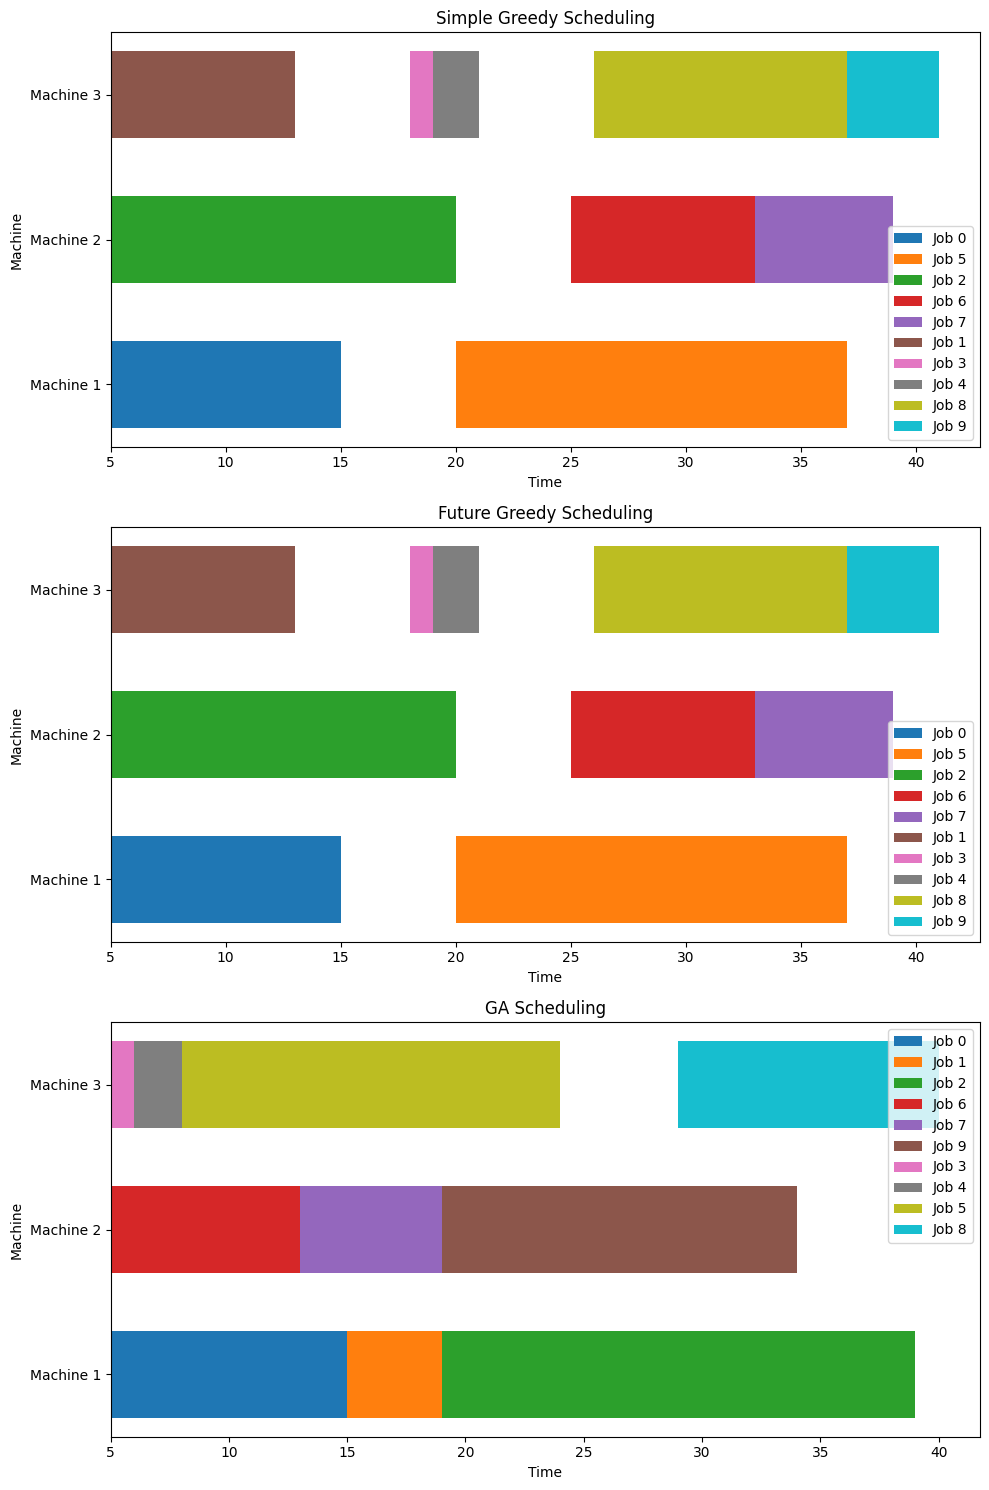

Total tardiness (Simple Greedy): 41
Total tardiness (Future Greedy): 41
Total tardiness (GA): 19


In [ ]:
# @title 7번 코드
import random
import matplotlib.pyplot as plt
import numpy as np

# 실험 instance
num_jobs = 10  # Number of jobs
num_machines = 3  # Number of machines
setup_time = 5  # Setup time

# 각 기계에 대해 각 작업의 실행 시간을 지정
machine_processing_times = [[] for _ in range(num_machines)]
due_dates = [random.randint(20, 40) for _ in range(num_jobs)]  # 각 작업의 마감 시간 설정

for job_index in range(num_jobs):
    for machine_index in range(num_machines):
        machine_processing_times[machine_index].append(random.randint(1, 20))

# 각 job이 할당될 eligible한 기계 설정
eligible_machines = [[] for _ in range(num_jobs)]
for job_index in range(num_jobs):
    num_eligible = random.randint(1, num_machines)  # 최소 1개에서 최대 num_machines 개의 기계 선택
    eligible_machines[job_index] = random.sample(range(num_machines), num_eligible)

# Job families 설정
job_families = [
    [0, 1, 2],  # Family 1
    [3, 4, 5],  # Family 2
    [6, 7, 8, 9]  # Family 3
]

# 각 job의 family 찾기
job_family = {}
for i, family in enumerate(job_families):
    for job in family:
        job_family[job] = i

# Simple Greedy 알고리즘을 사용한 job 할당
def schedule_jobs_simple_greedy(machine_processing_times, due_dates, eligible_machines, job_family, setup_time):
    machine_schedule = [[] for _ in range(num_machines)]
    machine_end_times = [0] * num_machines  # 각 기계의 작업 종료 시간 초기화
    last_job_family = [-1] * num_machines  # 각 기계의 마지막 작업의 family

    tardiness_sum = 0

    # 모든 작업에 대해 처리
    for job_index in range(num_jobs):
        min_end_time = float('inf')
        candidate_machines = list(eligible_machines[job_index])  # eligible한 기계 후보들

        # eligible한 기계 후보 중에서 가장 일찍 끝나는 기계 선택
        for machine_index in candidate_machines:
            setup = setup_time if last_job_family[machine_index] != job_family[job_index] else 0
            end_time_with_setup = machine_end_times[machine_index] + setup
            if end_time_with_setup < min_end_time:
                min_end_time = end_time_with_setup
                best_machine = machine_index

        proc_time = machine_processing_times[best_machine][job_index]
        job_due_date = due_dates[job_index]
        setup = setup_time if last_job_family[best_machine] != job_family[job_index] else 0

        start_time = machine_end_times[best_machine] + setup  # 작업 시작 시간
        end_time = start_time + proc_time  # 작업 종료 시간

        machine_schedule[best_machine].append((job_index, proc_time, start_time, end_time))
        machine_end_times[best_machine] = end_time  # 기계의 작업 종료 시간 갱신
        last_job_family[best_machine] = job_family[job_index]  # 마지막 작업 family 갱신

        # 지연 시간 계산
        tardiness = max(0, end_time - job_due_date)
        tardiness_sum += tardiness

    return machine_schedule, tardiness_sum

# Future Greedy 알고리즘을 사용한 job 할당
def schedule_jobs_future_greedy(machine_processing_times, due_dates, eligible_machines, job_family, setup_time):
    machine_schedule = [[] for _ in range(num_machines)]
    machine_end_times = [0] * num_machines  # 각 기계의 작업 종료 시간 초기화
    last_job_family = [-1] * num_machines  # 각 기계의 마지막 작업의 family

    tardiness_sum = 0

    # 모든 작업에 대해 처리
    for job_index in range(num_jobs):
        candidate_machines = list(eligible_machines[job_index])  # eligible한 기계 후보들

        # 모든 후보 기계에 대해 job을 할당한 후 가장 빨리 끝나는 기계 선택
        min_end_time = float('inf')
        for machine_index in candidate_machines:
            setup = setup_time if last_job_family[machine_index] != job_family[job_index] else 0
            start_time = machine_end_times[machine_index] + setup
            end_time = start_time + machine_processing_times[machine_index][job_index]

            # 가장 일찍 끝나는 기계 선택
            if end_time < min_end_time:
                min_end_time = end_time
                best_machine = machine_index

        proc_time = machine_processing_times[best_machine][job_index]
        job_due_date = due_dates[job_index]
        setup = setup_time if last_job_family[best_machine] != job_family[job_index] else 0

        start_time = machine_end_times[best_machine] + setup  # 작업 시작 시간
        end_time = start_time + proc_time  # 작업 종료 시간

        machine_schedule[best_machine].append((job_index, proc_time, start_time, end_time))
        machine_end_times[best_machine] = end_time  # 기계의 작업 종료 시간 갱신
        last_job_family[best_machine] = job_family[job_index]  # 마지막 작업 family 갱신

        # 지연 시간 계산
        tardiness = max(0, end_time - job_due_date)
        tardiness_sum += tardiness

    return machine_schedule, tardiness_sum


# Genetic Algorithm을 사용한 스케줄링 문제 해결
def genetic_algorithm(machine_processing_times, due_dates, eligible_machines, job_family, setup_time, pop_size=50, generations=100, mutation_rate=0.1):
    def create_individual():
        return [random.choice(eligible_machines[job]) for job in range(num_jobs)]

    def calculate_tardiness(individual):
        machine_schedule = [[] for _ in range(num_machines)]
        machine_end_times = [0] * num_machines
        last_job_family = [-1] * num_machines
        tardiness_sum = 0

        for job_index, machine in enumerate(individual):
            proc_time = machine_processing_times[machine][job_index]
            job_due_date = due_dates[job_index]
            setup = setup_time if last_job_family[machine] != job_family[job_index] else 0
            start_time = machine_end_times[machine] + setup
            end_time = start_time + proc_time

            machine_schedule[machine].append((job_index, proc_time, start_time, end_time))
            machine_end_times[machine] = end_time
            last_job_family[machine] = job_family[job_index]

            tardiness = max(0, end_time - job_due_date)
            tardiness_sum += tardiness

        return tardiness_sum, machine_schedule

    def crossover(parent1, parent2):
        crossover_point = random.randint(0, num_jobs - 1)
        child = parent1[:crossover_point] + parent2[crossover_point:]
        return child

    def mutate(individual):
        if random.random() < mutation_rate:
            job_index = random.randint(0, num_jobs - 1)
            individual[job_index] = random.choice(eligible_machines[job_index])

    # 초기 인구 생성
    population = [create_individual() for _ in range(pop_size)]
    best_individual = None
    best_tardiness = float('inf')
    best_schedule = None

    for _ in range(generations):
        population = sorted(population, key=lambda ind: calculate_tardiness(ind)[0])

        if calculate_tardiness(population[0])[0] < best_tardiness:
            best_tardiness = calculate_tardiness(population[0])[0]
            best_individual = population[0]
            best_schedule = calculate_tardiness(population[0])[1]

        next_generation = population[:pop_size // 2]

        for i in range(pop_size // 2, pop_size):
            parent1, parent2 = random.sample(next_generation, 2)
            child = crossover(parent1, parent2)
            mutate(child)
            next_generation.append(child)

        population = next_generation

    return best_schedule, best_tardiness


# Simple Greedy 알고리즘을 사용한 스케쥴 획득
machine_schedule_simple_greedy, total_tardiness_simple_greedy = schedule_jobs_simple_greedy(machine_processing_times, due_dates, eligible_machines, job_family, setup_time)

# Future Greedy 알고리즘을 사용한 스케쥴 획득
machine_schedule_future_greedy, total_tardiness_future_greedy = schedule_jobs_future_greedy(machine_processing_times, due_dates, eligible_machines, job_family, setup_time)

# GA 알고리즘을 사용한 스케쥴 획득
machine_schedule_ga, total_tardiness_ga = genetic_algorithm(machine_processing_times, due_dates, eligible_machines, job_family, setup_time)

# 간트 차트 생성을 위한 데이터 정리
def flatten_schedule(machine_schedule):
    flat_schedule = []
    for machine_index, jobs in enumerate(machine_schedule):
        for job_index, proc_time, start_time, end_time in jobs:
            flat_schedule.append((machine_index, job_index, start_time, end_time))
    return flat_schedule

flat_schedule_simple_greedy = flatten_schedule(machine_schedule_simple_greedy)
flat_schedule_future_greedy = flatten_schedule(machine_schedule_future_greedy)
flat_schedule_ga = flatten_schedule(machine_schedule_ga)

# Plotting the Gantt chart
def plot_gantt(flat_schedule, title, ax):
    for machine_index, job_index, start_time, end_time in flat_schedule:
        ax.barh(machine_index, end_time - start_time, left=start_time, height=0.6, label=f'Job {job_index}')

    ax.set_yticks(range(num_machines))
    ax.set_yticklabels([f'Machine {i+1}' for i in range(num_machines)])
    ax.set_xlabel('Time')
    ax.set_ylabel('Machine')
    ax.set_title(title)
    ax.legend()

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

plot_gantt(flat_schedule_simple_greedy, 'Simple Greedy Scheduling', axs[0])
plot_gantt(flat_schedule_future_greedy, 'Future Greedy Scheduling', axs[1])
plot_gantt(flat_schedule_ga, 'GA Scheduling', axs[2])

plt.tight_layout()
plt.show()

# Tardiness의 합 출력
print(f"Total tardiness (Simple Greedy): {total_tardiness_simple_greedy}")
print(f"Total tardiness (Future Greedy): {total_tardiness_future_greedy}")
print(f"Total tardiness (GA): {total_tardiness_ga}")


#다음 코드에 추가할 조건  -
#다음 코드에 추가할 조건  - simple greedy 삭제
#다음 코드에 추가할 조건  - simulated annealing 적용
#다음 코드에 추가할 조건  -
#다음 코드에 추가할 조건  -

In [ ]:
# @title 8번 코드
import random
import matplotlib.pyplot as plt
import numpy as np

# 실험 instance
num_jobs = 10  # Number of jobs
num_machines = 3  # Number of machines
setup_time = 5  # Setup time

# 각 기계에 대해 각 작업의 실행 시간을 지정
machine_processing_times = [[] for _ in range(num_machines)]
due_dates = [random.randint(20, 40) for _ in range(num_jobs)]  # 각 작업의 마감 시간 설정

for job_index in range(num_jobs):
    for machine_index in range(num_machines):
        machine_processing_times[machine_index].append(random.randint(1, 20))

# 각 job이 할당될 eligible한 기계 설정
eligible_machines = [[] for _ in range(num_jobs)]
for job_index in range(num_jobs):
    num_eligible = random.randint(1, num_machines)  # 최소 1개에서 최대 num_machines 개의 기계 선택
    eligible_machines[job_index] = random.sample(range(num_machines), num_eligible)

# Job families 설정
job_families = [
    [0, 1, 2],  # Family 1
    [3, 4, 5],  # Family 2
    [6, 7, 8, 9]  # Family 3
]

# 각 job의 family 찾기
job_family = {}
for i, family in enumerate(job_families):
    for job in family:
        job_family[job] = i

# Future Greedy 알고리즘을 사용한 job 할당
def schedule_jobs_future_greedy(machine_processing_times, due_dates, eligible_machines, job_family, setup_time):
    machine_schedule = [[] for _ in range(num_machines)]
    machine_end_times = [0] * num_machines  # 각 기계의 작업 종료 시간 초기화
    last_job_family = [-1] * num_machines  # 각 기계의 마지막 작업의 family

    tardiness_sum = 0

    # 모든 작업에 대해 처리
    for job_index in range(num_jobs):
        candidate_machines = list(eligible_machines[job_index])  # eligible한 기계 후보들

        # 모든 후보 기계에 대해 job을 할당한 후 가장 빨리 끝나는 기계 선택
        min_end_time = float('inf')
        for machine_index in candidate_machines:
            setup = setup_time if last_job_family[machine_index] != job_family[job_index] else 0
            start_time = machine_end_times[machine_index] + setup
            end_time = start_time + machine_processing_times[machine_index][job_index]

            # 가장 일찍 끝나는 기계 선택
            if end_time < min_end_time:
                min_end_time = end_time
                best_machine = machine_index

        proc_time = machine_processing_times[best_machine][job_index]
        job_due_date = due_dates[job_index]
        setup = setup_time if last_job_family[best_machine] != job_family[job_index] else 0

        start_time = machine_end_times[best_machine] + setup  # 작업 시작 시간
        end_time = start_time + proc_time  # 작업 종료 시간

        machine_schedule[best_machine].append((job_index, proc_time, start_time, end_time))
        machine_end_times[best_machine] = end_time  # 기계의 작업 종료 시간 갱신
        last_job_family[best_machine] = job_family[job_index]  # 마지막 작업 family 갱신

        # 지연 시간 계산
        tardiness = max(0, end_time - job_due_date)
        tardiness_sum += tardiness

    return machine_schedule, tardiness_sum

# Future Greedy 알고리즘을 사용한 스케쥴 획득
machine_schedule_future_greedy, total_tardiness_future_greedy = schedule_jobs_future_greedy(machine_processing_times, due_dates, eligible_machines, job_family, setup_time)

# Genetic Algorithm을 사용한 스케줄링 문제 해결
def genetic_algorithm(machine_processing_times, due_dates, eligible_machines, job_family, setup_time, pop_size=50, generations=100, mutation_rate=0.1):
    def create_individual():
        return [random.choice(eligible_machines[job]) for job in range(num_jobs)]

    def calculate_tardiness(individual):
        machine_schedule = [[] for _ in range(num_machines)]
        machine_end_times = [0] * num_machines
        last_job_family = [-1] * num_machines
        tardiness_sum = 0

        for job_index, machine in enumerate(individual):
            proc_time = machine_processing_times[machine][job_index]
            job_due_date = due_dates[job_index]
            setup = setup_time if last_job_family[machine] != job_family[job_index] else 0
            start_time = machine_end_times[machine] + setup
            end_time = start_time + proc_time

            machine_schedule[machine].append((job_index, proc_time, start_time, end_time))
            machine_end_times[machine] = end_time
            last_job_family[machine] = job_family[job_index]

            tardiness = max(0, end_time - job_due_date)
            tardiness_sum += tardiness

        return tardiness_sum, machine_schedule

    def crossover(parent1, parent2):
        crossover_point = random.randint(0, num_jobs - 1)
        child = parent1[:crossover_point] + parent2[crossover_point:]
        return child

    def mutate(individual):
        if random.random() < mutation_rate:
            job_index = random.randint(0, num_jobs - 1)
            individual[job_index] = random.choice(eligible_machines[job_index])

    # 초기 인구 생성
    population = [create_individual() for _ in range(pop_size)]
    best_individual = None
    best_tardiness = float('inf')
    best_schedule = None

    for _ in range(generations):
        population = sorted(population, key=lambda ind: calculate_tardiness(ind)[0])

        if calculate_tardiness(population[0])[0] < best_tardiness:
            best_tardiness = calculate_tardiness(population[0])[0]
            best_individual = population[0]
            best_schedule = calculate_tardiness(population[0])[1]

        next_generation = population[:pop_size // 2]

        for i in range(pop_size // 2, pop_size):
            parent1, parent2 = random.sample(next_generation, 2)
            child = crossover(parent1, parent2)
            mutate(child)
            next_generation.append(child)

        population = next_generation

    return best_schedule, best_tardiness

# GA 알고리즘을 사용한 스케쥴 획득
machine_schedule_ga, total_tardiness_ga = genetic_algorithm(machine_processing_times, due_dates, eligible_machines, job_family, setup_time)

# Simulated Annealing을 사용한 스케줄링 문제 해결
def simulated_annealing(machine_processing_times, due_dates, eligible_machines, job_family, setup_time, initial_temp=1000, cooling_rate=0.95, max_iter=1000):
    def create_initial_solution():
        return [random.choice(eligible_machines[job]) for job in range(num_jobs)]

    def calculate_tardiness(individual):
        machine_schedule = [[] for _ in range(num_machines)]
        machine_end_times = [0] * num_machines
        last_job_family = [-1] * num_machines
        tardiness_sum = 0

        for job_index, machine in enumerate(individual):
            proc_time = machine_processing_times[machine][job_index]
            job_due_date = due_dates[job_index]
            setup = setup_time if last_job_family[machine] != job_family[job_index] else 0
            start_time = machine_end_times[machine] + setup
            end_time = start_time + proc_time

            machine_schedule[machine].append((job_index, proc_time, start_time, end_time))
            machine_end_times[machine] = end_time
            last_job_family[machine] = job_family[job_index]

            tardiness = max(0, end_time - job_due_date)
            tardiness_sum += tardiness

        return tardiness_sum, machine_schedule

    def get_neighbor(solution):
        new_solution = solution[:]
        job_index = random.randint(0, num_jobs - 1)
        new_solution[job_index] = random.choice(eligible_machines[job_index])
        return new_solution

    current_solution = create_initial_solution()
    current_tardiness, current_schedule = calculate_tardiness(current_solution)
    best_solution = current_solution[:]
    best_tardiness = current_tardiness
    best_schedule = current_schedule
    temperature = initial_temp

    for _ in range(max_iter):
        new_solution = get_neighbor(current_solution)
        new_tardiness, new_schedule = calculate_tardiness(new_solution)
        if new_tardiness < best_tardiness:
            best_tardiness = new_tardiness
            best_solution = new_solution[:]
            best_schedule = new_schedule
        if new_tardiness < current_tardiness or random.random() < np.exp((current_tardiness - new_tardiness) / temperature):
            current_solution = new_solution[:]
            current_tardiness = new_tardiness
            current_schedule = new_schedule
        temperature *= cooling_rate

    return best_schedule, best_tardiness

# Simulated Annealing 알고리즘을 사용한 스케쥴 획득
machine_schedule_sa, total_tardiness_sa = simulated_annealing(machine_processing_times, due_dates, eligible_machines, job_family, setup_time)

# 간트 차트 생성을 위한 데이터 정리
def flatten_schedule(machine_schedule):
    flat_schedule = []
    for machine_index, jobs in enumerate(machine_schedule):
        for job_index, proc_time, start_time, end_time in jobs:
            flat_schedule.append((machine_index, job_index, start_time, end_time))
    return flat_schedule

flat_schedule_future_greedy = flatten_schedule(machine_schedule_future_greedy)
flat_schedule_ga = flatten_schedule(machine_schedule_ga)
flat_schedule_sa = flatten_schedule(machine_schedule_sa)

# Plotting the Gantt chart
def plot_gantt(flat_schedule, title, ax):
    for machine_index, job_index, start_time, end_time in flat_schedule:
        ax.barh(machine_index, end_time - start_time, left=start_time, height=0.6, label=f'Job {job_index}')

    ax.set_yticks(range(num_machines))
    ax.set_yticklabels([f'Machine {i+1}' for i in range(num_machines)])
    ax.set_xlabel('Time')
    ax.set_ylabel('Machine')
    ax.set_title(title)
    ax.legend()

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

plot_gantt(flat_schedule_future_greedy, 'Future Greedy Scheduling', axs[0])
plot_gantt(flat_schedule_ga, 'GA Scheduling', axs[1])
plot_gantt(flat_schedule_sa, 'Simulated Annealing Scheduling', axs[2])

plt.tight_layout()
plt.show()

# Tardiness의 합 출력
print(f"Total tardiness (Future Greedy): {total_tardiness_future_greedy}")
print(f"Total tardiness (GA): {total_tardiness_ga}")
print(f"Total tardiness (SA): {total_tardiness_sa}")

#다음 코드에 추가할 조건  - GP 적용?
#다음 코드에 추가할 조건  - precedence 적용?
#다음 코드에 추가할 조건  - sequence dependent setup time?
#다음 코드에 추가할 조건  - Dynamic arrive job 가정 + GP 적용! (하나씩)
#다음 코드에 추가할 조건  -

In [ ]:
!pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 1.9 MB/s eta 0:00:00


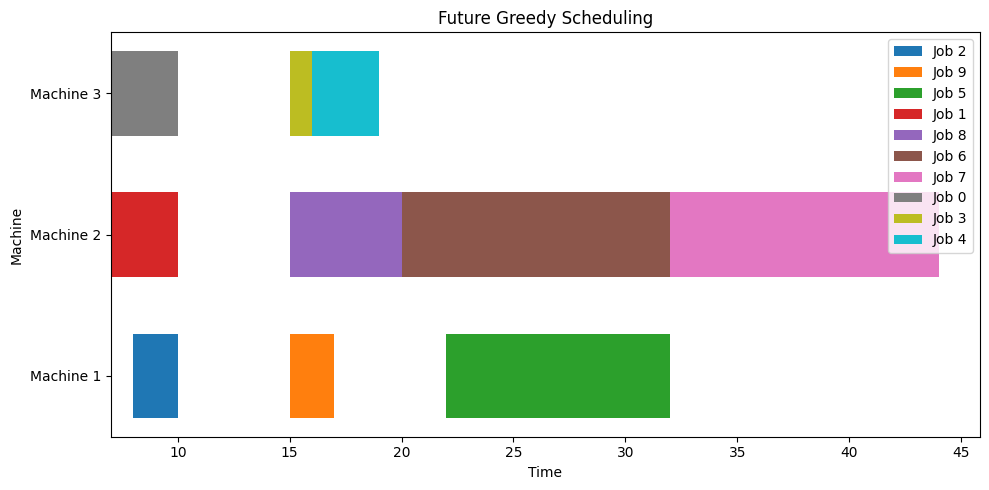

Total tardiness (Future Greedy): 18


In [ ]:
# @title 9번 코드
import random
import matplotlib.pyplot as plt
import numpy as np

# 실험 instance
num_jobs = 10  # Number of jobs
num_machines = 3  # Number of machines
setup_time = 5  # Setup time

# 각 기계에 대해 각 작업의 실행 시간을 지정
machine_processing_times = [[] for _ in range(num_machines)]
due_dates = [random.randint(20, 40) for _ in range(num_jobs)]  # 각 작업의 마감 시간 설정
arrival_times = [random.randint(0, 20) for _ in range(num_jobs)]  # 각 작업의 도착 시간 설정

for job_index in range(num_jobs):
    for machine_index in range(num_machines):
        machine_processing_times[machine_index].append(random.randint(1, 20))

# 각 job이 할당될 eligible한 기계 설정
eligible_machines = [[] for _ in range(num_jobs)]
for job_index in range(num_jobs):
    num_eligible = random.randint(1, num_machines)  # 최소 1개에서 최대 num_machines 개의 기계 선택
    eligible_machines[job_index] = random.sample(range(num_machines), num_eligible)

# Job families 설정
job_families = [
    [0, 1, 2],  # Family 1
    [3, 4, 5],  # Family 2
    [6, 7, 8, 9]  # Family 3
]

# 각 job의 family 찾기
job_family = {}
for i, family in enumerate(job_families):
    for job in family:
        job_family[job] = i

# Future Greedy 알고리즘을 사용한 job 할당
def schedule_jobs_future_greedy(machine_processing_times, due_dates, arrival_times, eligible_machines, job_family, setup_time):
    machine_schedule = [[] for _ in range(num_machines)]
    machine_end_times = [0] * num_machines  # 각 기계의 작업 종료 시간 초기화
    last_job_family = [-1] * num_machines  # 각 기계의 마지막 작업의 family

    tardiness_sum = 0

    jobs = list(range(num_jobs))
    jobs.sort(key=lambda x: arrival_times[x])  # 도착 시간 기준으로 정렬

    for job_index in jobs:
        candidate_machines = list(eligible_machines[job_index])  # eligible한 기계 후보들

        # 모든 후보 기계에 대해 job을 할당한 후 가장 빨리 끝나는 기계 선택
        min_end_time = float('inf')
        for machine_index in candidate_machines:
            ready_time = max(machine_end_times[machine_index], arrival_times[job_index])  # 기계가 사용 가능해지는 시간
            setup = setup_time if last_job_family[machine_index] != job_family[job_index] else 0
            start_time = ready_time + setup
            end_time = start_time + machine_processing_times[machine_index][job_index]

            # 가장 일찍 끝나는 기계 선택
            if end_time < min_end_time:
                min_end_time = end_time
                best_machine = machine_index

        proc_time = machine_processing_times[best_machine][job_index]
        job_due_date = due_dates[job_index]
        ready_time = max(machine_end_times[best_machine], arrival_times[job_index])
        setup = setup_time if last_job_family[best_machine] != job_family[job_index] else 0

        start_time = ready_time + setup  # 작업 시작 시간
        end_time = start_time + proc_time  # 작업 종료 시간

        machine_schedule[best_machine].append((job_index, proc_time, start_time, end_time))
        machine_end_times[best_machine] = end_time  # 기계의 작업 종료 시간 갱신
        last_job_family[best_machine] = job_family[job_index]  # 마지막 작업 family 갱신

        # 지연 시간 계산
        tardiness = max(0, end_time - job_due_date)
        tardiness_sum += tardiness

    return machine_schedule, tardiness_sum

# Future Greedy 알고리즘을 사용한 스케쥴 획득
machine_schedule_future_greedy, total_tardiness_future_greedy = schedule_jobs_future_greedy(
    machine_processing_times, due_dates, arrival_times, eligible_machines, job_family, setup_time)

# 간트 차트 생성을 위한 데이터 정리
def flatten_schedule(machine_schedule):
    flat_schedule = []
    for machine_index, jobs in enumerate(machine_schedule):
        for job_index, proc_time, start_time, end_time in jobs:
            flat_schedule.append((machine_index, job_index, start_time, end_time))
    return flat_schedule

flat_schedule_future_greedy = flatten_schedule(machine_schedule_future_greedy)

# Plotting the Gantt chart
def plot_gantt(flat_schedule, title, ax):
    for machine_index, job_index, start_time, end_time in flat_schedule:
        ax.barh(machine_index, end_time - start_time, left=start_time, height=0.6, label=f'Job {job_index}')

    ax.set_yticks(range(num_machines))
    ax.set_yticklabels([f'Machine {i+1}' for i in range(num_machines)])
    ax.set_xlabel('Time')
    ax.set_ylabel('Machine')
    ax.set_title(title)
    ax.legend()

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

plot_gantt(flat_schedule_future_greedy, 'Future Greedy Scheduling', ax)

plt.tight_layout()
plt.show()

# Tardiness의 합 출력
print(f"Total tardiness (Future Greedy): {total_tardiness_future_greedy}")

#다음 코드에 추가할 조건  - GP 적용
#다음 코드에 추가할 조건  -
#다음 코드에 추가할 조건  -
#다음 코드에 추가할 조건  -
#다음 코드에 추가할 조건  -

In [ ]:
# @title 10번 코드
import random
import operator
import numpy as np
import matplotlib.pyplot as plt

from deap import gp, creator, base, tools, algorithms
from deap.gp import PrimitiveTree
import functools

# 실험 instance
num_jobs = 10  # Number of jobs
num_machines = 3  # Number of machines
setup_time = 5  # Setup time

# 각 기계에 대해 각 작업의 실행 시간을 지정
machine_processing_times = [[] for _ in range(num_machines)]
due_dates = [random.randint(20, 40) for _ in range(num_jobs)]  # 각 작업의 마감 시간 설정
arrival_times = [random.randint(0, 20) for _ in range(num_jobs)]  # 각 작업의 도착 시간 설정

for job_index in range(num_jobs):
    for machine_index in range(num_machines):
        machine_processing_times[machine_index].append(random.randint(1, 20))

# 각 job이 할당될 eligible한 기계 설정
eligible_machines = [[] for _ in range(num_jobs)]
for job_index in range(num_jobs):
    num_eligible = random.randint(1, num_machines)  # 최소 1개에서 최대 num_machines 개의 기계 선택
    eligible_machines[job_index] = random.sample(range(num_machines), num_eligible)

# Job families 설정
job_families = [
    [0, 1, 2],  # Family 1
    [3, 4, 5],  # Family 2
    [6, 7, 8, 9]  # Family 3
]

# 각 job의 family 찾기
job_family = {}
for i, family in enumerate(job_families):
    for job in family:
        job_family[job] = i

# 기존 creator 제거 (이 경고를 피하기 위해)
if 'FitnessMin' in creator.__dict__:
    del creator.FitnessMin
if 'Individual' in creator.__dict__:
    del creator.Individual

# GP 설정
pset = gp.PrimitiveSetTyped("MAIN", [float, float, float, float, float], float)
pset.addPrimitive(lambda x, y: x + y, [float, float], float, name="add")
pset.addPrimitive(lambda x, y: x - y, [float, float], float, name="sub")
pset.addPrimitive(lambda x, y: x * y, [float, float], float, name="mul")
pset.addPrimitive(lambda x, y: x / y if y != 0 else 1, [float, float], float, name="div")
pset.addEphemeralConstant("rand101", functools.partial(random.uniform, 0, 1), float)
pset.renameArguments(ARG0="proc_time")
pset.renameArguments(ARG1="num_jobs")
pset.renameArguments(ARG2="setup")
pset.renameArguments(ARG3="due_date")
pset.renameArguments(ARG4="end_time")


creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=3)
toolbox.register("individual", tools.initCycle, creator.Individual, (toolbox.expr, toolbox.expr), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("compile", gp.compile, pset=pset)

def evaluate_gp(individual):
    routing_rule = toolbox.compile(expr=PrimitiveTree(individual[0]))
    sequencing_rule = toolbox.compile(expr=PrimitiveTree(individual[1]))

    machine_schedule = [[] for _ in range(num_machines)]
    machine_end_times = [0] * num_machines
    last_job_family = [-1] * num_machines

    tardiness_sum = 0
    current_time = 0

    jobs = list(range(num_jobs))
    jobs.sort(key=lambda x: arrival_times[x])

    while jobs or any(machine_schedule):
        for job_index in jobs[:]:
            job_index = int(job_index)  # Ensure job_index is an integer
            if arrival_times[job_index] <= current_time:
                # Rest of your code

                candidate_machines = list(eligible_machines[job_index])
                priorities = [routing_rule(machine_processing_times[machine][job_index],
                                           len(machine_schedule[machine]),
                                           setup_time if last_job_family[machine] != job_family[job_index] else 0,
                                           due_dates[job_index],
                                           machine_end_times[machine])
                              for machine in candidate_machines]
                best_machine = candidate_machines[priorities.index(max(priorities))]

                proc_time = machine_processing_times[best_machine][job_index]
                job_due_date = due_dates[job_index]
                ready_time = max(machine_end_times[best_machine], arrival_times[job_index])
                setup = setup_time if last_job_family[best_machine] != job_family[job_index] else 0

                start_time = ready_time + setup
                end_time = start_time + proc_time

                machine_schedule[best_machine].append((job_index, proc_time, start_time, end_time))
                machine_end_times[best_machine] = end_time
                last_job_family[best_machine] = job_family[job_index]
                jobs.remove(job_index)

                tardiness = max(0, end_time - job_due_date)
                tardiness_sum += tardiness

        for machine_index, jobs in enumerate(machine_schedule):
            if jobs and machine_end_times[machine_index] <= current_time:
                job_index, proc_time, start_time, end_time = jobs[0]
                priorities = [sequencing_rule(machine_processing_times[machine_index][j],
                                              len(machine_schedule[machine_index]),
                                              setup_time if last_job_family[machine_index] != job_family[j] else 0,
                                              due_dates[j],
                                              machine_end_times[machine_index])
                              for j in range(len(jobs))]
                best_job_index = priorities.index(max(priorities))

                job_index, proc_time, start_time, end_time = jobs.pop(best_job_index)
                machine_schedule[machine_index] = machine_schedule[machine_index][best_job_index:]

                current_time = end_time
            else:
                current_time += 1

    return tardiness_sum,

toolbox.register("evaluate", evaluate_gp)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxOnePoint)
# 함수 트리 생성
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
def mutate(individual):
    index = random.randrange(len(individual))
    slice_ = individual.searchSubtree(index)
    type_ = individual[index].ret
    individual[slice_] = toolbox.expr_mut(pset=pset, type_=type_)
    return individual,

# mutate 함수를 toolbox에 등록
toolbox.register("mutate", mutate)



population = toolbox.population(n=300)
hof = tools.HallOfFame(1)
algorithms.eaSimple(population, toolbox, 0.7, 0.2, 40, halloffame=hof)

best_individual = hof[0]
print("Best individual:", best_individual)
print("Best individual's fitness:", evaluate_gp(best_individual))



# Future Greedy 알고리즘을 사용한 job 할당
def schedule_jobs_future_greedy(machine_processing_times, due_dates, arrival_times, eligible_machines, job_family, setup_time):
    machine_schedule = [[] for _ in range(num_machines)]
    machine_end_times = [0] * num_machines  # 각 기계의 작업 종료 시간 초기화
    last_job_family = [-1] * num_machines  # 각 기계의 마지막 작업의 family

    tardiness_sum = 0

    jobs = list(range(num_jobs))
    jobs.sort(key=lambda x: arrival_times[x])  # 도착 시간 기준으로 정렬

    for job_index in jobs:
        candidate_machines = list(eligible_machines[job_index])  # eligible한 기계 후보들

        # 모든 후보 기계에 대해 job을 할당한 후 가장 빨리 끝나는 기계 선택
        min_end_time = float('inf')
        for machine_index in candidate_machines:
            ready_time = max(machine_end_times[machine_index], arrival_times[job_index])  # 기계가 사용 가능해지는 시간
            setup = setup_time if last_job_family[machine_index] != job_family[job_index] else 0
            start_time = ready_time + setup
            end_time = start_time + machine_processing_times[machine_index][job_index]

            # 가장 일찍 끝나는 기계 선택
            if end_time < min_end_time:
                min_end_time = end_time
                best_machine = machine_index

        proc_time = machine_processing_times[best_machine][job_index]
        job_due_date = due_dates[job_index]
        ready_time = max(machine_end_times[best_machine], arrival_times[job_index])
        setup = setup_time if last_job_family[best_machine] != job_family[job_index] else 0

        start_time = ready_time + setup  # 작업 시작 시간
        end_time = start_time + proc_time  # 작업 종료 시간

        machine_schedule[best_machine].append((job_index, proc_time, start_time, end_time))
        machine_end_times[best_machine] = end_time  # 기계의 작업 종료 시간 갱신
        last_job_family[best_machine] = job_family[job_index]  # 마지막 작업 family 갱신

        # 지연 시간 계산
        tardiness = max(0, end_time - job_due_date)
        tardiness_sum += tardiness

    return machine_schedule, tardiness_sum



# Future Greedy 알고리즘을 사용한 스케쥴 획득
machine_schedule_future_greedy, total_tardiness_future_greedy = schedule_jobs_future_greedy(
    machine_processing_times, due_dates, arrival_times, eligible_machines, job_family, setup_time)

# 간트 차트 생성을 위한 데이터 정리
def flatten_schedule(machine_schedule):
    flat_schedule = []
    for machine_index, jobs in enumerate(machine_schedule):
        for job_index, proc_time, start_time, end_time in jobs:
            flat_schedule.append((machine_index, job_index, start_time, end_time))
    return flat_schedule

flat_schedule_future_greedy = flatten_schedule(machine_schedule_future_greedy)

# Plotting the Gantt chart
def plot_gantt(flat_schedule, title, ax):
    for machine_index, job_index, start_time, end_time in flat_schedule:
        ax.barh(machine_index, end_time - start_time, left=start_time, height=0.6, label=f'Job {job_index}')

    ax.set_yticks(range(num_machines))
    ax.set_yticklabels([f'Machine {i+1}' for i in range(num_machines)])
    ax.set_xlabel('Time')
    ax.set_ylabel('Machine')
    ax.set_title(title)
    ax.legend()

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

plot_gantt(flat_schedule_future_greedy, 'Future Greedy Scheduling', ax)

plt.tight_layout()
plt.show()

# Tardiness의 합 출력
print(f"Total tardiness (Future Greedy): {total_tardiness_future_greedy}")


In [ ]:
# @title 10번 수정본
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import creator, base, tools, gp, algorithms
import operator
from functools import partial
import warnings

# 기존 클래스 삭제
if hasattr(creator, "FitnessMin"):
    del creator.FitnessMin
if hasattr(creator, "Individual"):
    del creator.Individual

# EventQueue 클래스 정의
class EventQueue:
    def __init__(self):
        self.events = []

    def add_event(self, event_time, event_type, event_data):
        self.events.append((event_time, event_type, event_data))
        self.events.sort(key=lambda x: x[0])

    def pop_event(self):
        return self.events.pop(0)

    def is_empty(self):
        return len(self.events) == 0
###################################################
# 다이나믹한 설정일 경우 계속해서 큐가 바뀌는 현상
# 시점을 attribute로 시간마다 적용해야하는 룰 체크 => 다음 체크할 시간도 결정을 해야함
# SPT로 실제 계산이랑 맞는지 확인하면서 진행
# 머신 기준으로 시뮬레이터 진행 => idle 해질때마다 job들 할당
# 피클파일? 랜덤시드 유지하는 느낌 => 룰마다 같은 데이터로 진행하기 위함
# 리소스 도입까지 마지막에 => SPT, 리소스, GP (코드 받아서 시뮬레이터 구축) => 다음주 월요일 4시
####################################################
# Machine 클래스 정의
class Machine:
    def __init__(self, index):
        self.index = index
        self.schedule = []

    def assign_job(self, job):
        self.schedule.append(job)

    def finish_job(self, job, end_time):
        job.end_time = end_time
        self.schedule.append(job)

# Job 클래스 정의
class Job:
    def __init__(self, job_index, arrival_time):
        self.job_index = job_index
        self.arrival_time = arrival_time
        self.end_time = None
        self.start_time = None

# 실험 instance
num_jobs = 10  # Number of jobs
num_machines = 3  # Number of machines
setup_time = 5  # Setup time

# 각 기계에 대해 각 작업의 실행 시간을 지정
machine_processing_times = [[] for _ in range(num_machines)]
due_dates = [random.randint(20, 40) for _ in range(num_jobs)]  # 각 작업의 마감 시간 설정
arrival_times = [random.randint(0, 20) for _ in range(num_jobs)]  # 각 작업의 도착 시간 설정

for job_index in range(num_jobs):
    for machine_index in range(num_machines):
        machine_processing_times[machine_index].append(random.randint(1, 20))

# 각 job이 할당될 eligible한 기계 설정
eligible_machines = [[] for _ in range(num_jobs)]
for job_index in range(num_jobs):
    num_eligible = random.randint(1, num_machines)  # 최소 1개에서 최대 num_machines 개의 기계 선택
    eligible_machines[job_index] = random.sample(range(num_machines), num_eligible)

# Job families 설정
job_families = [
    [0, 1, 2],  # Family 1
    [3, 4, 5],  # Family 2
    [6, 7, 8, 9]  # Family 3
]

# 각 job의 family 찾기
job_family = {}
for i, family in enumerate(job_families):
    for job in family:
        job_family[job] = i

# DEAP 설정
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

# DEAP의 PrimitiveSet 클래스를 사용하여 함수 집합 (Primitive Set) 생성
pset = gp.PrimitiveSet("MAIN", arity=2)

pset.addPrimitive(operator.add, arity=2)
pset.addPrimitive(operator.sub, arity=2)
pset.addPrimitive(operator.mul, arity=2)
#pset.addPrimitive(operator.neg, arity=1)

# Terminal functions
def give_me_proc_time(machine, job):
    return machine_processing_times[machine][job]

def is_there_setup_time(job_last, job_new):
    return setup_time if job_family[job_last] != job_family[job_new] else 0

def give_me_duedate(job):
    return due_dates[job]

def give_me_end_time(machine):
    return machine_end_times[machine]

# Wrapping terminal functions to make them callable
pset.addTerminal(give_me_proc_time)
#pset.addTerminal(is_there_setup_time)
pset.addTerminal(give_me_duedate)
pset.addTerminal(give_me_end_time)

toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=3)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.expr, n=2)  # 개체가 두 개의 서로 다른 트리로 이루어짐
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
#toolbox.register("compile", gp.compile, pset=pset)



def print_individual(individual):
    def primitive_to_str(primitive):
        if isinstance(primitive, gp.Primitive):
            return primitive.name
        elif isinstance(primitive, gp.Terminal):
            if primitive.value is not None:
                return str(primitive.value)
            return primitive.ret.__name__
        return str(primitive)

    return [[primitive_to_str(primitive) for primitive in tree] for tree in individual]


def evaluate_expression(expr, *args):
  stack = list(expr)
  result = []


  while stack:
    node = stack.pop()
    if isinstance(node, gp.Terminal):
      LLList = []
      for i in args:
        LLList.append(i)
      if node.value == 'give_me_proc_time':
        result.append(give_me_proc_time(LLList[1],LLList[0]))
      elif node.value == 'give_me_duedate':
        result.append(give_me_duedate(LLList[0]))
      else:
        result.append(give_me_end_time(LLList[1]))
    elif isinstance(node, gp.Primitive):
      if node.name == 'add':
        r = result.pop()
        l = result.pop()
        valll = l+r
        result.append(valll)
      elif node.name == 'sub':
        r = result.pop()
        l = result.pop()
        valll = l-r
        result.append(valll)
      else:
        r = result.pop()
        l = result.pop()
        valll = r*l
        result.append(valll)

  return result[0]


# Evaluate 함수 (스케줄링)
def evaluate(individual):
    print(individual)
    print(print_individual(individual))  # 사람이 읽을 수 있는 형태로 individual 프린트 추가

    global machine_end_times

    # Initialize Event Queue
    event_queue = EventQueue()

    # Initialize Machines
    machines = [Machine(index) for index in range(num_machines)]

    # Initialize Jobs
    jobs = []
    for job_index in range(num_jobs):
        job = Job(job_index, arrival_times[job_index])
        jobs.append(job)
        event_queue.add_event(job.arrival_time, 'job_arrival', job)

    # Initialize scheduling variables
    machine_end_times = [0] * num_machines
    last_job_family = [-1] * num_machines
    tardiness_sum = 0

    # Process events
    while not event_queue.is_empty():
        event_time, event_type, event_data = event_queue.pop_event()

        if event_type == 'job_arrival':
            job = event_data
            # Routing Rule 적용
            candidate_machines = eligible_machines[job.job_index]
            machine_priorities = [evaluate_expression(individual[0], job.job_index, machine) for machine in candidate_machines]
            print(f"Routing priorities for job {job.job_index}: {machine_priorities}")  # machine_priorities 출력
            best_machine = candidate_machines[np.argmax(machine_priorities)]

            # Assign job to the best machine
            machines[best_machine].assign_job(job)
            event_queue.add_event(event_time, 'job_finished', (best_machine, job))

        elif event_type == 'job_finished':
            machine_index, finished_job = event_data
            # Sequencing Rule 적용
            ready_time = max(machine_end_times[machine_index], finished_job.arrival_time)
            job_priority = evaluate_expression(individual[1], machine_index, finished_job.job_index)
            setup = setup_time if last_job_family[machine_index] != job_family[finished_job.job_index] else 0
            start_time = ready_time + setup
            end_time = start_time + machine_processing_times[machine_index][finished_job.job_index]

            # Update machine schedule and variables
            machines[machine_index].finish_job(finished_job, end_time)
            machine_end_times[machine_index] = end_time
            last_job_family[machine_index] = job_family[finished_job.job_index]

            # Calculate tardiness
            tardiness = max(0, end_time - due_dates[finished_job.job_index])
            tardiness_sum += tardiness

    return (tardiness_sum,)


# Genetic Algorithm 설정
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("mutate", gp.mutNodeReplacement, pset=pset)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

def main():
    pop = toolbox.population(n=50)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)

    algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=50, stats=stats, halloffame=hof, verbose=True)

    best_individual = hof[0]

    # Decode and apply best individual
    routing_rule = gp.compile(expr=gp.PrimitiveTree(best_individual[0]), pset=pset)
    sequencing_rule = gp.compile(expr=gp.PrimitiveTree(best_individual[1]), pset=pset)

    # Initialize Event Queue for final scheduling
    event_queue = EventQueue()

    # Initialize Machines for final scheduling
    machines = [Machine(index) for index in range(num_machines)]

    # Initialize Jobs for final scheduling
    jobs = []
    for job_index in range(num_jobs):
        job = Job(job_index, arrival_times[job_index])
        jobs.append(job)
        event_queue.add_event(job.arrival_time, 'job_arrival', job)

    # Initialize scheduling variables for final scheduling
    machine_end_times = [0] * num_machines
    last_job_family = [-1] * num_machines
    tardiness_sum = 0

    # Process events for final scheduling
    while not event_queue.is_empty():
        event_time, event_type, event_data = event_queue.pop_event()

        if event_type == 'job_arrival':
            job = event_data
            # Routing Rule 적용
            candidate_machines = eligible_machines[job.job_index]
            machine_priorities = [routing_rule(job.job_index, machine) for machine in candidate_machines]
            best_machine = candidate_machines[np.argmax(machine_priorities)]

            # Assign job to the best machine
            machines[best_machine].assign_job(job)
            event_queue.add_event(event_time, 'job_finished', (best_machine, job))

        elif event_type == 'job_finished':
            machine_index, finished_job = event_data
            # Sequencing Rule 적용
            ready_time = max(machine_end_times[machine_index], finished_job.arrival_time)
            job_priority = sequencing_rule(machine_index, finished_job.job_index)
            setup = setup_time if last_job_family[machine_index] != job_family[finished_job.job_index] else 0
            start_time = ready_time + setup
            end_time = start_time + machine_processing_times[machine_index][finished_job.job_index]

            # Update machine schedule and variables
            machines[machine_index].finish_job(finished_job, end_time)
            machine_end_times[machine_index] = end_time
            last_job_family[machine_index] = job_family[finished_job.job_index]

            # Calculate tardiness
            tardiness = max(0, end_time - due_dates[finished_job.job_index])
            tardiness_sum += tardiness

    # Print schedule and total tardiness
    print("Best individual (routing and sequencing rules):")
    print(best_individual)
    print("\nGenetic Programming Scheduling Result:")
    print(f"Total tardiness: {tardiness_sum}")

    # Visualize Gantt chart
    visualize_schedule(machines)

def visualize_schedule(machines):
    fig, ax = plt.subplots(figsize=(10, 5))
    colors = ['tab:blue', 'tab:orange', 'tab:green']
    for machine_index, machine in enumerate(machines):
        for job in machine.schedule:
            ax.barh(machine_index, job.end_time - job.start_time, left=job.start_time, height=0.6, color=colors[machine_index])

    ax.set_yticks(range(num_machines))
    ax.set_yticklabels([f'Machine {i+1}' for i in range(num_machines)])
    ax.set_xlabel('Time')
    ax.set_ylabel('Machine')
    ax.set_title('Genetic Programming Scheduling')
    ax.legend([f'Machine {i+1}' for i in range(num_machines)], loc='upper right')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


[[<deap.gp.Primitive object at 0x7eff97f463e0>, <deap.gp.Primitive object at 0x7eff97f46430>, <deap.gp.Terminal object at 0x7eff9811bd40>, <deap.gp.Terminal object at 0x7eff98447cc0>, <deap.gp.Terminal object at 0x7eff98447cc0>], [<deap.gp.Primitive object at 0x7eff97f46430>, <deap.gp.Terminal object at 0x7eff98447a80>, <deap.gp.Terminal object at 0x7eff9811bd40>]]
[['sub', 'mul', 'give_me_proc_time', 'give_me_end_time', 'give_me_end_time'], ['mul', 'ARG0', 'give_me_proc_time']]
Routing priorities for job 0: [0, 0]
Routing priorities for job 4: [-24, 0]
Routing priorities for job 9: [-60, 0, 0]


IndexError: list index out of range

In [ ]:
## 수정사항 아무거나 대입해보는 셀
## 수정사항 아무거나 대입해보는 셀
## 수정사항 아무거나 대입해보는 셀
## 수정사항 아무거나 대입해보는 셀
## 수정사항 아무거나 대입해보는 셀
## 수정사항 아무거나 대입해보는 셀
## 수정사항 아무거나 대입해보는 셀
## 수정사항 아무거나 대입해보는 셀
## 수정사항 아무거나 대입해보는 셀
## 수정사항 아무거나 대입해보는 셀
## 수정사항 아무거나 대입해보는 셀
## 수정사항 아무거나 대입해보는 셀
